In [189]:
from constants import POMS_MLM_DATA_DIR, POMS_GENDER_DATA_DIR, POMS_RACE_DATA_DIR, SENTIMENT_MLM_PRETRAIN_DATA_DIR, SENTIMENT_IMA_PRETRAIN_DATA_DIR, SENTIMENT_TOPICS_PRETRAIN_MLM_DIR, SENTIMENT_TOPICS_PRETRAIN_ITX_DIR
import matplotlib.pyplot as plt
import pandas as pd

In [190]:
POMS_MLM_LOSSES = f"{POMS_MLM_DATA_DIR}/model_enriched_noisy/losses.csv"
GENDER_LOSSES = f"{POMS_GENDER_DATA_DIR}/model_enriched_noisy/losses.csv"
RACE_LOSSES = f"{POMS_RACE_DATA_DIR}/model_enriched_noisy/losses.csv"

IMA_MLM_LOSSES = f"{SENTIMENT_MLM_PRETRAIN_DATA_DIR}/double_num_adj/unified/model/losses.csv"
IMA_LOSSES = f"{SENTIMENT_IMA_PRETRAIN_DATA_DIR}/double_num_adj/unified/model/losses.csv"
IMA_CONTROL_LOSSES = f"{SENTIMENT_IMA_PRETRAIN_DATA_DIR}/double_num_adj/unified/model_control/losses.csv"

TOPICS_MLM_LOSSES = f"{SENTIMENT_TOPICS_PRETRAIN_MLM_DIR}/books/model/losses.csv"
TOPICS_LOSSES = f"{SENTIMENT_TOPICS_PRETRAIN_ITX_DIR}/books/model/losses.csv"
TOPICS_CONTROL_LOSSES = f"{SENTIMENT_TOPICS_PRETRAIN_ITX_DIR}/books/model_control/losses.csv"

In [274]:
def plot_losses(losses_file, loss_columns, title, agg_f=None, mlm_factor=None):
    df = pd.read_csv(losses_file, usecols=["epoch"]+loss_columns)
    window_size = 300
    if mlm_factor:
        window_size = int(window_size/mlm_factor)
    if agg_f == "mean":
        df_agg = df.rolling(window_size).mean().iloc[::window_size, :]
    elif agg_f == "std":
        df_agg = df.rolling(window_size).std().iloc[::window_size, :]
        plt.xlabel(f"average of {window_size} steps")
        plt.title(f"{title} {agg_f} loss")
    for col in loss_columns:
        plt.plot(df_agg[col].to_numpy(), label=f"{title} {col.split('_')[0]}")
    plt.title(f"{title} {agg_f} loss")
    plt.xlabel(f"{agg_f} of {window_size} steps")
    plt.ylabel("loss")
    plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')

# Gender

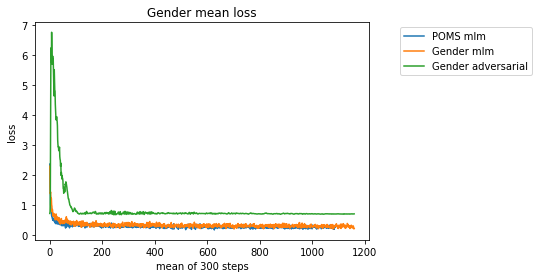

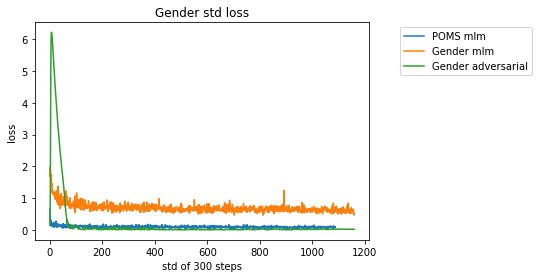

In [280]:
for agg_f in ("mean", "std"):
    plot_losses(POMS_MLM_LOSSES, ["mlm_loss"], "POMS", agg_f, 30)
    plot_losses(GENDER_LOSSES, ["mlm_loss", "adversarial_loss"], "Gender", agg_f)
    plt.show()

# Race

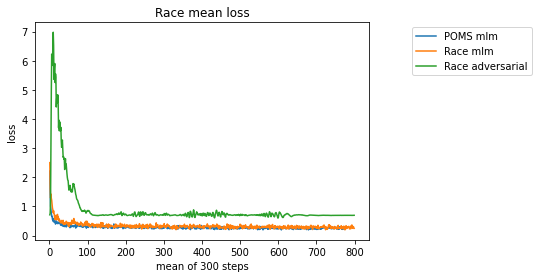

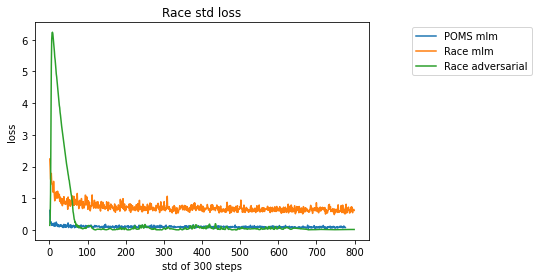

In [281]:
for agg_f in ("mean", "std"):
    plot_losses(POMS_MLM_LOSSES, ["mlm_loss"], "POMS", agg_f, 21)
    plot_losses(RACE_LOSSES, ["mlm_loss", "adversarial_loss"], "Race", agg_f)
    plt.show()

# IMA

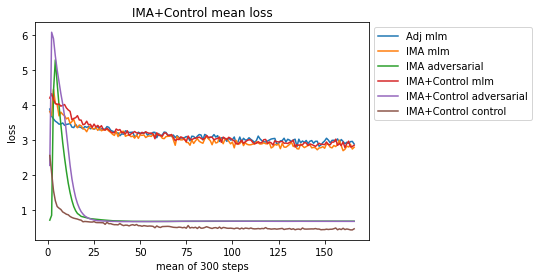

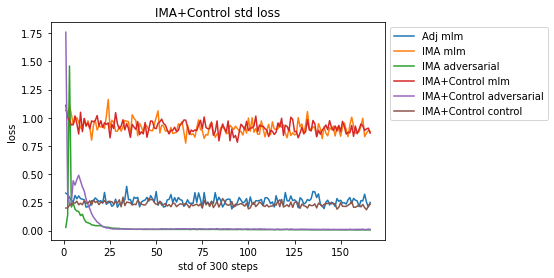

In [282]:
for agg_f in ("mean", "std"):
    plot_losses(IMA_MLM_LOSSES, ["mlm_loss"], "Adj", agg_f, 10)
    plot_losses(IMA_LOSSES, ["mlm_loss", "adversarial_loss"], "IMA", agg_f)
    plot_losses(IMA_CONTROL_LOSSES, ["mlm_loss", "adversarial_loss", "control_loss"], "IMA+Control", agg_f)
    plt.show()

# Topics (Treatment + Control for books domain)

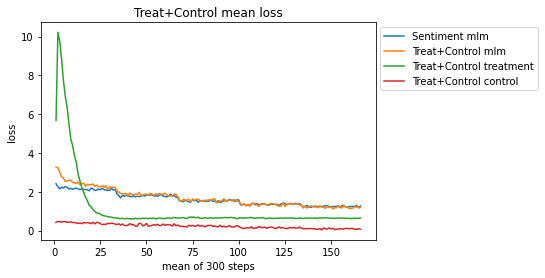

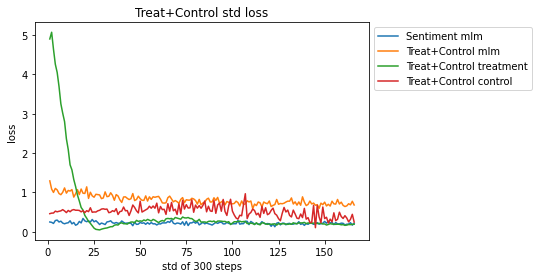

In [283]:
for agg_f in ("mean", "std"):
    plot_losses(TOPICS_MLM_LOSSES, ["mlm_loss"], "Sentiment", agg_f, 10)
    plot_losses(TOPICS_LOSSES, ["mlm_loss", "treatment_loss", "control_loss"], "Treat+Control", agg_f)
#     plot_losses(TOPICS_LOSSES, ["mlm_loss", "treatment_loss"], "Treat", agg_f)
#     plot_losses(TOPICS_CONTROL_LOSSES, ["mlm_loss", "treatment_loss", "control_loss"], "Treat+Control", agg_f)
    plt.show()